In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline

In [12]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    =∑(y(i) −φ(z(i)))∂w ⎜y(i) −∑(w(i)x(i) jj∂⎛⎞)⎟ ij⎝i⎠
    
    Parameters
------------
eta : float
    Learning rate (between 0.0 and 1.0)
n_iter : int
    Passes over the training dataset.
Attributes
-----------
w_ : 1d-array
    Weights after fitting.
errors_ : list
    Number of misclassifications in every epoch.
    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        """ Fit training data.
    Parameters
    ----------
    X : {array-like}, shape = [n_samples, n_features]
        Training vectors,
        where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target values.
    Returns
    -------
    self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)


In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
...   'machine-learning-databases/iris/iris.data', header=None)

In [4]:
X = df.iloc[0:100, [0,2]].values
y = df.iloc[0:100,4].values
y = np.where(y=='Iris-setosa', -1, 1)

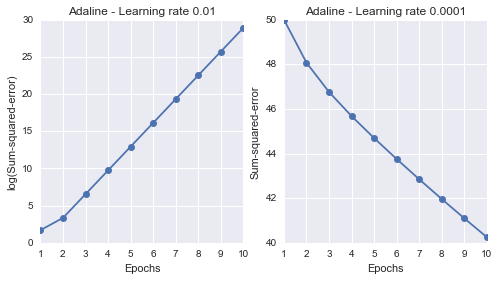

In [5]:
>>> fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
>>> ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
>>> ax[0].plot(range(1, len(ada1.cost_) + 1),
...            np.log10(ada1.cost_), marker='o')
>>> ax[0].set_xlabel('Epochs')
>>> ax[0].set_ylabel('log(Sum-squared-error)')
>>> ax[0].set_title('Adaline - Learning rate 0.01')
>>> ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
>>> ax[1].plot(range(1, len(ada2.cost_) + 1),
...            ada2.cost_, marker='o')
>>> ax[1].set_xlabel('Epochs')
>>> ax[1].set_ylabel('Sum-squared-error')
>>> ax[1].set_title('Adaline - Learning rate 0.0001')
plt.savefig("adaline different learning rates.jpg")

#### Standardizing X

In [6]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

#### After standardization, we will train the Adaline again and see that it now converges using a learning rate η = 0.01:

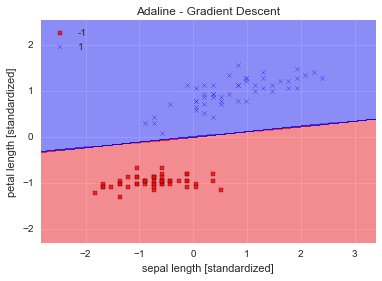

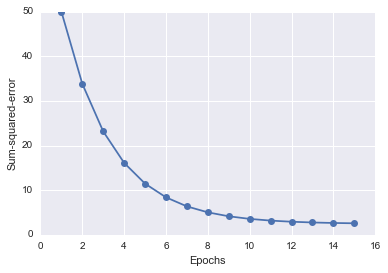

In [7]:
from decision_region import plot_decision_regions
>>> ada = AdalineGD(n_iter=15, eta=0.01)
>>> ada.fit(X_std, y)
>>> plot_decision_regions(X_std, y, classifier=ada)
>>> plt.title('Adaline - Gradient Descent')
>>> plt.xlabel('sepal length [standardized]')
>>> plt.ylabel('petal length [standardized]')
>>> plt.legend(loc='upper left')
>>> plt.show()
>>> plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
>>> plt.xlabel('Epochs')
>>> plt.ylabel('Sum-squared-error')
>>> plt.show()